In [6]:
#upload data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline
import pandas as pd
from google.colab import files
files.upload()

Saving diabetes_data_upload.csv to diabetes_data_upload (1).csv


{'diabetes_data_upload.csv': b'Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class\r\n40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive\r\n58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive\r\n41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive\r\n45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive\r\n60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive\r\n55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive\r\n57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive\r\n66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive\r\n67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive\r\n70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive\r\n44,Male,Yes,Yes,No,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Positive\r\n3

In [7]:
# load dataset
df = pd.read_csv('diabetes_data_upload.csv')
df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [8]:
# total data
df.shape

(520, 17)

In [43]:
X1.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


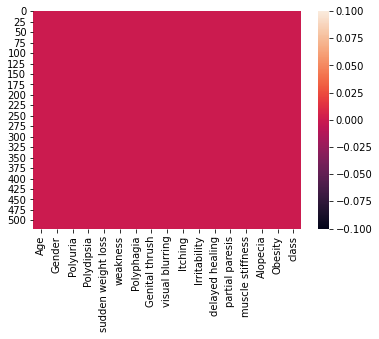

In [9]:
sns.heatmap(df.isnull())

In [10]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [40]:
df['Gender'].value_counts()

1    328
0    192
Name: Gender, dtype: int64

In [41]:
df['Obesity'].value_counts()

0    432
1     88
Name: Obesity, dtype: int64

In [11]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Polyuria'] = df['Polyuria'].map({'Yes':1,'No':0})
df['Polydipsia'] = df['Polydipsia'].map({'Yes':1,'No':0})
df['sudden weight loss'] = df['sudden weight loss'].map({'Yes':1,'No':0})
df['weakness'] = df['weakness'].map({'Yes':1,'No':0})
df['Polyphagia'] = df['Polyphagia'].map({'Yes':1,'No':0})
df['Genital thrush'] = df['Genital thrush'].map({'Yes':1,'No':0})
df['visual blurring'] = df['visual blurring'].map({'Yes':1,'No':0})
df['Itching'] = df['Itching'].map({'Yes':1,'No':0})
df['Irritability'] = df['Irritability'].map({'Yes':1,'No':0})
df['delayed healing'] = df['delayed healing'].map({'Yes':1,'No':0})
df['partial paresis'] = df['partial paresis'].map({'Yes':1,'No':0})
df['muscle stiffness'] = df['muscle stiffness'].map({'Yes':1,'No':0})
df['Alopecia'] = df['Alopecia'].map({'Yes':1,'No':0})
df['Obesity'] = df['Obesity'].map({'Yes':1,'No':0})
df['class'] = df['class'].map({'Positive':1,'Negative':0})

In [12]:
corrdata = df.corr()

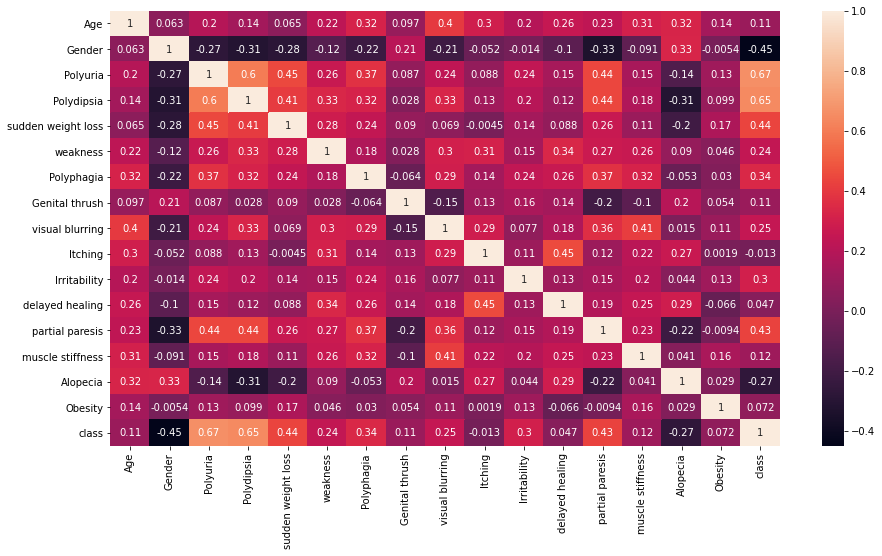

In [13]:
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


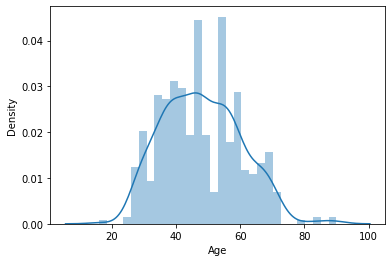

In [14]:
sns.distplot(df['Age'],bins=30) 

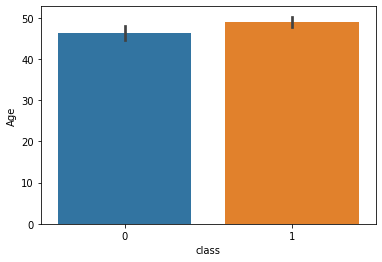

In [45]:
sns.barplot(x='class',y='Age',data=df)

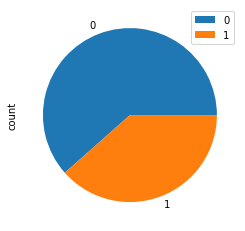

In [16]:
ds = df['class'].value_counts().reset_index()
ds.columns = ['class', 'count']
plot=ds.plot.pie(y='count')

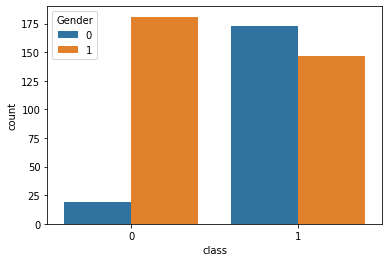

In [17]:
sns.countplot(x='class',data=df,hue='Gender')

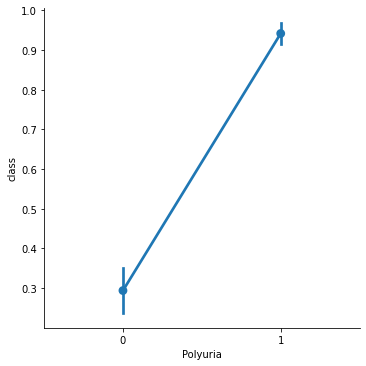

In [18]:
sns.catplot(x="Polyuria", y="class", kind="point", data=df)

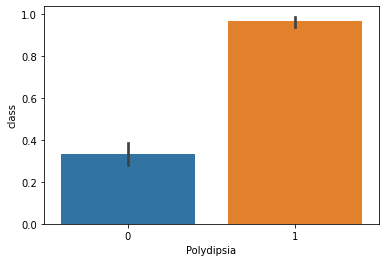

In [19]:
sns.barplot(x='Polydipsia',y='class',data=df)

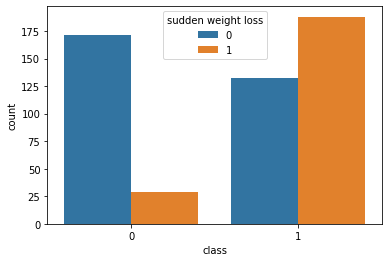

In [23]:
sns.countplot(x='class',data=df,hue='sudden weight loss')

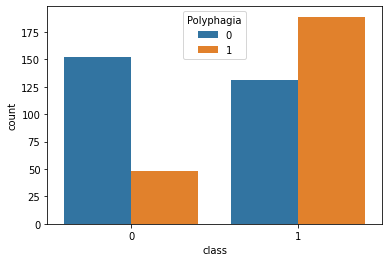

In [24]:
sns.countplot(x='class',data=df, hue='Polyphagia')

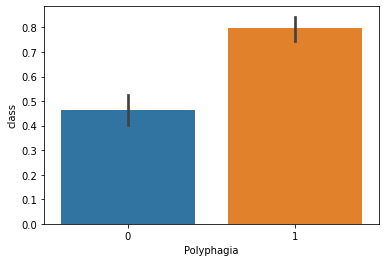

In [25]:
sns.barplot(x='Polyphagia',y='class',data=df)

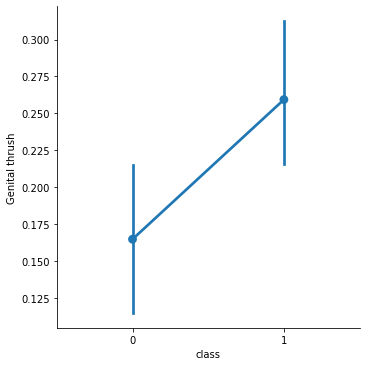

In [26]:
sns.catplot(x='class',y='Genital thrush',kind='point',data=df)

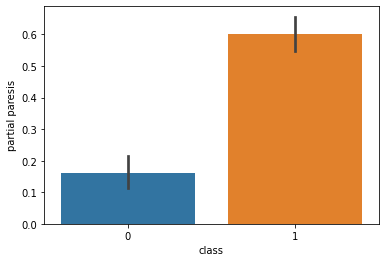

In [27]:
sns.barplot(x='class',y='partial paresis',data=df)

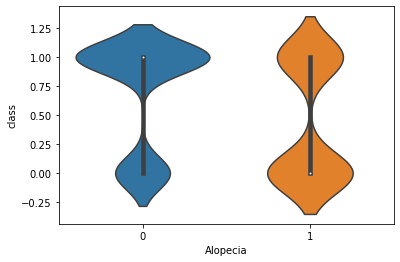

In [28]:
sns.violinplot(x='Alopecia',y='class',data=df)

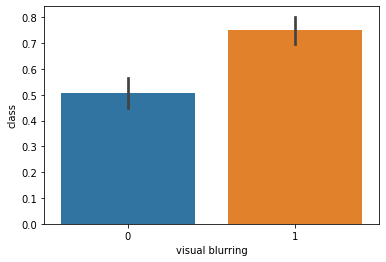

In [29]:
sns.barplot(x="visual blurring", y="class", data=df)

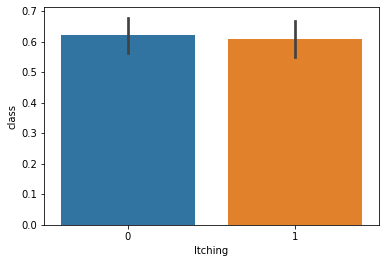

In [30]:
sns.barplot(x="Itching", y="class", data=df)

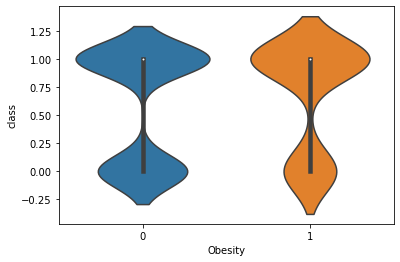

In [31]:
#obesity
sns.violinplot(x='Obesity',y='class',data=df)

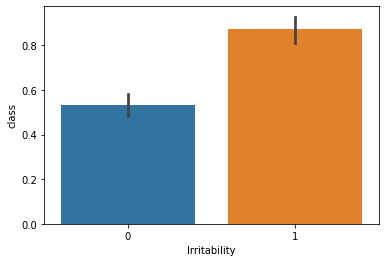

In [32]:
sns.barplot(x='Irritability',y='class',data=df)

In [33]:
X1 = df.iloc[:,0:-1]
y1 = df.iloc[:,-1]

In [34]:
X1.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X1,y1)

In [36]:
df_scores = pd.DataFrame(fit.scores_)
df_cols = pd.DataFrame(X1.columns)

In [37]:
featurescores = pd.concat([df_cols,df_scores],axis=1)
featurescores.columns=['column','scores']

In [38]:
featurescores

,column,scores
0,Age,18.845767
1,Gender,38.747637
2,Polyuria,116.184593
3,Polydipsia,120.785515
4,sudden weight loss,57.749309
5,weakness,12.724262
6,Polyphagia,33.198418
7,Genital thrush,4.914009
8,visual blurring,18.124571
9,Itching,0.047826


In [39]:
print(featurescores.nlargest(10,'scores'))

                column      scores
3           Polydipsia  120.785515
2             Polyuria  116.184593
4   sudden weight loss   57.749309
12     partial paresis   55.314286
1               Gender   38.747637
10        Irritability   35.334127
6           Polyphagia   33.198418
14            Alopecia   24.402793
0                  Age   18.845767
8      visual blurring   18.124571


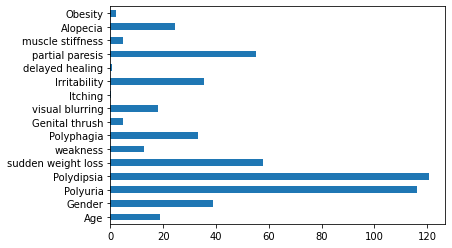

In [ ]:
featureview=pd.Series(fit.scores_, index=X1.columns)
featureview.plot(kind='barh')

In [ ]:
from sklearn.feature_selection import VarianceThreshold
feature_high_variance = VarianceThreshold(threshold=(0.5*(1-0.5)))
falls=feature_high_variance.fit(X1)

In [ ]:
df_scores1 = pd.DataFrame(falls.variances_)
dat1 = pd.DataFrame(X1.columns)

In [ ]:
high_variance = pd.concat([df_scores1,dat1],axis=1)
high_variance.columns=['variance','cols']

In [ ]:
high_variance[high_variance['variance']>0.2]

,variance,cols
0,147.374168,Age
1,0.232899,Gender
2,0.249985,Polyuria
3,0.247304,Polydipsia
4,0.243162,sudden weight loss
5,0.242511,weakness
6,0.248044,Polyphagia
8,0.247304,visual blurring
9,0.249819,Itching
11,0.248369,delayed healing


In [ ]:
X = df[['Polydipsia','sudden weight loss','partial paresis','Irritability','Polyphagia','Age','visual blurring']]
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lg, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 84.85 %
std is 4.95 %


In [ ]:
pre=lg.predict(X_test)

In [ ]:
logistic_regression=accuracy_score(pre,y_test)
print(accuracy_score(pre,y_test))
print(confusion_matrix(pre,y_test))

0.8942307692307693
[[34  5]
 [ 6 59]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.92      0.91      0.91        65

    accuracy                           0.89       104
   macro avg       0.89      0.89      0.89       104
weighted avg       0.89      0.89      0.89       104



In [ ]:
#SVM Linear
from sklearn.svm import SVC
sv=SVC(kernel='linear',random_state=0)
sv.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=sv, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 83.18 %
std is 4.94 %


In [ ]:
pre1=sv.predict(X_test)

In [ ]:
svm_linear=accuracy_score(pre1,y_test)
print(accuracy_score(pre1,y_test))
print(confusion_matrix(pre1,y_test))

0.9038461538461539
[[34  4]
 [ 6 60]]


In [ ]:
#SVM RBF
from sklearn.metrics import classification_report
print(classification_report(pre1,y_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        38
           1       0.94      0.91      0.92        66

    accuracy                           0.90       104
   macro avg       0.89      0.90      0.90       104
weighted avg       0.91      0.90      0.90       104



In [ ]:
from sklearn.svm import SVC
svrf=SVC(kernel='rbf',random_state=0)
svrf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svrf, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 88.47 %
std is 3.69 %


In [ ]:
pre2=svrf.predict(X_test)

In [ ]:
svm_rbf=accuracy_score(pre2,y_test)
print(accuracy_score(pre2,y_test))
print(confusion_matrix(pre2,y_test))

0.9807692307692307
[[39  1]
 [ 1 63]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pre2,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
score=[]

for i in range(1,10):
    
    
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    pre3=knn.predict(X_test)
    ans=accuracy_score(pre3,y_test)
    score.append(round(100*ans,2))
print(sorted(score,reverse=True)[:5])
knn=sorted(score,reverse=True)[:1]

[98.08, 98.08, 98.08, 98.08, 97.12]


In [ ]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=gb, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 82.94 %
std is 8.03 %


In [ ]:
pre4=gb.predict(X_test)

In [ ]:
Naive_bayes_Gaussian_nb=accuracy_score(pre4,y_test)
print(accuracy_score(pre4,y_test))
print(confusion_matrix(pre4,y_test))

0.8557692307692307
[[32  7]
 [ 8 57]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pre4,y_test))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        39
           1       0.89      0.88      0.88        65

    accuracy                           0.86       104
   macro avg       0.85      0.85      0.85       104
weighted avg       0.86      0.86      0.86       104



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='gini')
dc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 91.12 %
std is 3.70 %


In [ ]:
pre5=dc.predict(X_test)

In [ ]:
#Decision Trees
Decisiontress_classifier=accuracy_score(pre5,y_test)
print(accuracy_score(pre5,y_test))
print(confusion_matrix(pre5,y_test))

0.9711538461538461
[[39  2]
 [ 1 62]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pre5,y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.97      0.98      0.98        63

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
estime=[]
for i in range(1,100):
    rc=RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    rc.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 89.90 %
std is 5.60 %


In [ ]:
pre6 = rc.predict(X_test)

In [ ]:
Random_forest=accuracy_score(pre6,y_test)
print(accuracy_score(pre6,y_test))
print(confusion_matrix(pre6,y_test))

0.9807692307692307
[[39  1]
 [ 1 63]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pre6,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



In [ ]:
#Accuracies of all classification model overview
print('Logistic regression:',logistic_regression)
print('svmlinear:',svm_linear)
print('svmrbf:',svm_rbf)
print('knn:',knn)
print('naive bayes:',Naive_bayes_Gaussian_nb)
print('Decision tress:',Decisiontress_classifier)
print('Random forest:',Random_forest)

Logistic regression: 0.8942307692307693
svmlinear: 0.9038461538461539
svmrbf: 0.9807692307692307
knn: [98.08]
naive bayes: 0.8557692307692307
Decision tress: 0.9711538461538461
Random forest: 0.9807692307692307


In [ ]:
#The Best model is SVM, KNN and Random forest with 98%